# Support Vector Regression (SVR)

## Importing the libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [41]:
!gdown --id 1gw-n3qoPCa3vVVLxPjiMG-cxvjw3wWOl

dataset = pd.read_csv('support_vector_regression_Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gw-n3qoPCa3vVVLxPjiMG-cxvjw3wWOl
To: /content/support_vector_regression_Position_Salaries.csv
100% 246/246 [00:00<00:00, 324kB/s]


In [42]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [43]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [44]:
#np.darray is expected as inputs in the later part
y = y.reshape(len(y),1)


In [45]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

The implementation of SVR won't even work without using feature scaling.

See the salary has a large range of 40k to 1million. 

Also, salary (the dependent variable) and Level(independent) is on different scale. There is a chance that level might be neglected by the model against salary. 

In [46]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler() 
sc_y = StandardScaler() 

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [48]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [49]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [56]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

Also learn how to reverse back from feature scaling to original data.


In [64]:
prediction_scaled = regressor.predict(sc_X.transform([[6.5]]))
prediction_scaled_reshaped = prediction_scaled.reshape(-1,1)
prediction_actual = sc_y.inverse_transform(prediction_scaled_reshaped)
print(prediction_actual)

[[170370.0204065]]


## Visualising the SVR results

In [84]:
sc_y.inverse_transform(regressor.predict(X).reshape(-1,1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

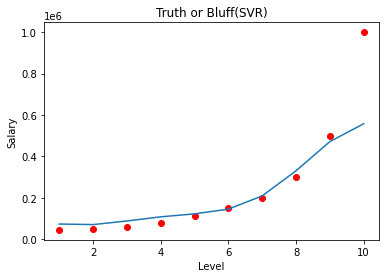

In [85]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

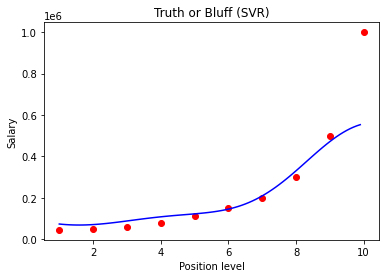

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()